In [ ]:
import re
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# functions to call an api and get the extracted text from the image or from the image url respectively

def ocr_space_file(img_file, overlay=False, language='eng', api_key='helloworld',isTable=True,scale=True,isorient=True,ocrEngine=1):

    payload = {'isOverlayRequired': overlay,
               'apikey': api_key,
               'language': language,
               'isTable': isTable,
               'detectOrientation': isorient,
               'scale': scale,
               'OCREngine':ocrEngine
               }
    # with open(filename, 'rb') as f:
    #     r = requests.post('https://api.ocr.space/parse/image',
    #                       files={filename: f},
    #                       data=payload,
    #                       )
    # return r.content.decode()
    r = requests.post('https://api.ocr.space/parse/image',
                          files={"filename": img_file},
                          data=payload,
                          )
    return r.content.decode()


def ocr_space_url(url, overlay=False, api_key='helloworld', language='eng'):

    payload = {'url': url,
               'isOverlayRequired': overlay,
               'apikey': api_key,
               'language': language,
               }
    r = requests.post('https://api.ocr.space/parse/image',
                      data=payload,
                      )
    return r.content.decode()



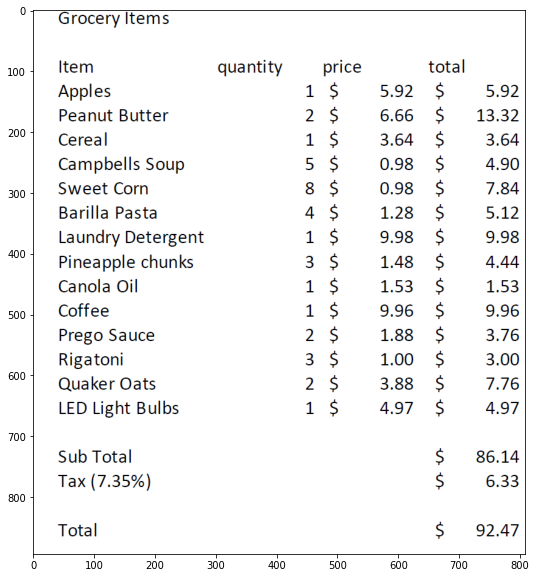

In [ ]:

plt.figure(figsize=(10,10))
plt.imshow(plt.imread("grocery_bill.png"))

In [ ]:
import json
#calling the api fuction
test_file = ocr_space_file(filename='grocery_bill.png',overlay=True,api_key='94800fa31388957',ocrEngine=1)
#converting it into dict from the json format
file=json.loads(test_file)
#getting the parsed data
data=file["ParsedResults"][0]["ParsedText"]
print(data)

In [ ]:
"""
preprocessing the data, extracting the item_name and it's price from each line
then storing it into items list which will be udes to segregate the 
food-items into it's categories of fruits, vegetable and packed-foods
"""
items=[]
print("items\tPrice")
for i in data.split("\n"):
    i=i.strip("\r").strip("\t").split("\t")
    if len(i)>2 and bool(re.search(r'\d', " ".join(i))):
        item,price=i[0].lower(),i[-1]
        print(f"{item}\t{price}")
        items.append(item)


In [ ]:
"""
reading the categories of each food from csv file
you can store this table in database
"""
shelf=pd.read_excel("shelf life (1).xlsx",names=["name","max_day","min_day","condition","category"])
shelf.name=shelf.name.apply(lambda x:x.replace(u'\xa0', u'').lower())
category=shelf[shelf.name.str.contains("apples")]["category"].values[0]

In [ ]:
"""
Seperating the items
"""
fruits,vegetables,packed=[],[],[]
for item in items:
    try:
        cat=shelf[shelf.name.str.contains(f"{item}")]["category"].values[0]
#         print(cat,item)
        if cat=="fruit":
            fruits.append(item)
        elif cat=="vegetable":
            vegetables.append(item)
        else:
            packed.append(item) 
    except:
        continue

In [ ]:
print(f'Fruits: {", ".join(fruits)}')
print("-----------------------")
print(f'Vegetables: {", ".join(vegetables)}')
print("------------------------")
print(f'Packed: {", ".join(packed)}')


Fruits: apples, lemons
-----------------------
Vegetables: spinach, beans
------------------------
Packed: peanut butter, salt


In [ ]:
"""
this api is used to convert the items list in hindi
Google Translator Api
as per user choice
"""
from googletrans import Translator
translator = Translator()

while True:
    print("\nHello!!!\n\nWelcome to Naaniz\n")
    print("\nPlease enter your language...\n")
    print("1 :- हिंदी (Hindi)\n2 :- தமிழ் (Tamil)\n3 :- తెలుగు (Telugu)\n4 :- English (English)")
    print("\nALWAYS WRITE YOUR TEXT ACCORDING TO YOUR LANGUAGE PHONETICS\n")
    options = ["hi", "ta", "te","en-us"]
    pref = int(input("Now please enter your preference : "))
    if pref <= 5:
        language = options[pref - 1]
    if pref == 0:
        exit(0)

    Counter = 0
    Content="\n".join(items)
    print("\n\n\n")
#     print(CoList)
    for i in items:
        if i:
            translated21 = translator.translate(Content, dest=language)
            print("Output : \n",translated21.text)
        break
    break


Hello!!!

Welcome to Naaniz


Please enter your language...

1 :- हिंदी (Hindi)
2 :- தமிழ் (Tamil)
3 :- తెలుగు (Telugu)
4 :- English (English)

ALWAYS WRITE YOUR TEXT ACCORDING TO YOUR LANGUAGE PHONETICS

Now please enter your preference : 1




Output : 
 सेब
नींबू
पालक
फलियां
नमक
मक्खन
